# High-NA vectorial PSF generation

Detailed models are required to generate high-NA point-spread-functions. Due to the large angles, it is crucial to take into account the vectorial nature of the electric field. This approach allows for accurate modeling of polarization and the inclusion of various correction factors.

For more information, please check https://arxiv.org/abs/2502.03170.

In [1]:
from typing import Optional, Tuple

import matplotlib.pyplot as plt
import numpy as np
from jax import random

from chromatix.functional import (
    gaussian_source,
    high_na_lens,
)

key = random.PRNGKey(42)


%load_ext autoreload
%autoreload 2

In [2]:
camera_shape: Tuple[int, int] = (256, 256)
pupil_shape: Tuple[int, int] = (256, 256)
camera_pixel_pitch: float = 0.005
f: float = 100
NA: float = 1.3
n: float = 1.5
wavelength: float = 0.532
wavelength_ratio: float = 1.0
pad: int = 0
taper_width: Optional[float] = 0

# Scalar high-NA PSF

In [3]:
field_pup = gaussian_source(
    pupil_shape,
    wavelength,
    wavelength_ratio,
    0,
    f,
    n,
    NA,
    power=1,
    amplitude=1.0,  # scalar amplitude
    offset=np.array([0.0, 0.0]),
    scalar=True,  # scalar
    envelope_waist=1,
)
field, spherical_u = high_na_lens(
    field_pup,
    f,
    n,
    NA,
    camera_shape,
    camera_pixel_pitch,
    wavelength,
    return_spherical_u=True,
)
psf_truth = (np.abs(field.u) ** 2).sum(axis=-1)

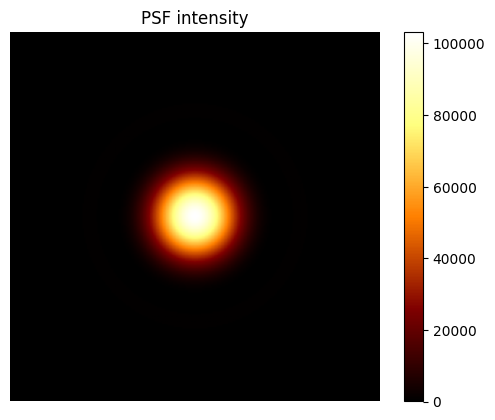

In [4]:
plt.figure()
plt.imshow(psf_truth.squeeze(), cmap="afmhot")
plt.colorbar()
plt.title("PSF intensity")
plt.axis("off")
plt.show()

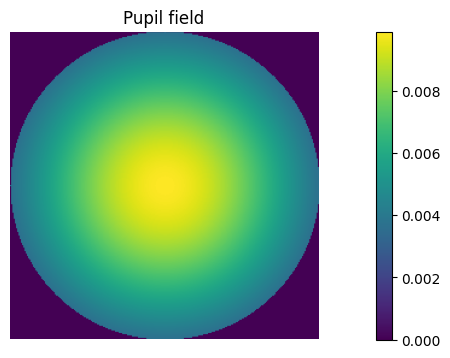

In [5]:
plt.figure(figsize=(15, 4))
plt.imshow(np.abs(spherical_u).squeeze())
plt.colorbar()
plt.axis("off")
plt.title("Pupil field")
plt.show()

# Vectorial high-NA PSF

In [6]:
field_pup = gaussian_source(
    pupil_shape,
    wavelength,
    wavelength_ratio,
    0,
    f,
    n,
    NA,
    power=1,
    amplitude=np.array([0.0, 0.0, 1.0]),  # vectorial amplitude
    offset=np.array([0.0, 0.0]),
    scalar=False,
    envelope_waist=1,
)
field, spherical_u = high_na_lens(
    field_pup,
    f,
    n,
    NA,
    camera_shape,
    camera_pixel_pitch,
    wavelength,
    return_spherical_u=True,
)
psf_truth = (np.abs(field.u) ** 2).sum(axis=-1)

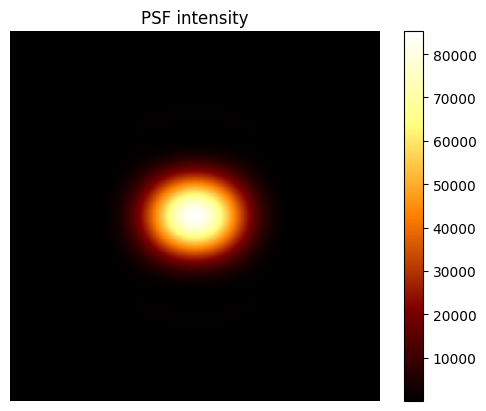

In [7]:
plt.figure()
plt.imshow(psf_truth.squeeze(), cmap="afmhot")
plt.colorbar()
plt.title("PSF intensity")
plt.axis("off")
plt.show()

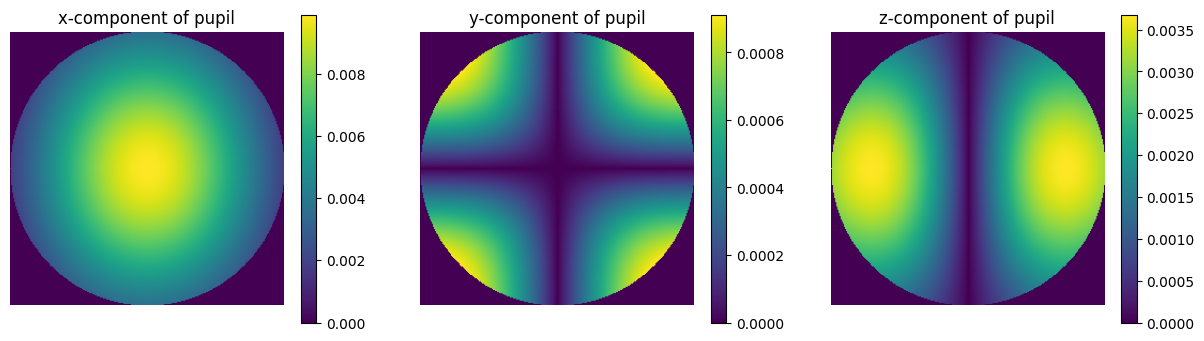

In [8]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(np.abs(spherical_u).squeeze()[:, :, 2])
plt.colorbar()
plt.axis("off")
plt.title("x-component of pupil")
plt.subplot(1, 3, 2)
plt.imshow(np.abs(spherical_u).squeeze()[:, :, 1])
plt.colorbar()
plt.axis("off")
plt.title("y-component of pupil")
plt.subplot(1, 3, 3)
plt.imshow(np.abs(spherical_u).squeeze()[:, :, 0])
plt.colorbar()
plt.axis("off")
plt.title("z-component of pupil")
plt.show()